### DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise. It’s particularly effective for identifying clusters of arbitrary shape and handling noise in datasets.
### Core Points: A point is considered a core point if it has a specified number of points (MinPts) within a given radius (eps).
### Border Points: A point is a border point if it’s not a core point but falls within the radius of a core point.
### Noise: Points that are neither core nor border points are considered noise(outlier).
### The algorithm proceeds by identifying core points and then grouping together these core points that are within the eps(max) distance of each other, along with their associated border points. This method allows DBSCAN to find clusters of varying shapes and sizes, and it’s robust against outliers, which are treated as noise

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for dataset
from sklearn.datasets import make_moons
# for model
from sklearn.cluster import DBSCAN

In [24]:
# dataset
x,y=make_moons(n_samples=250, noise=0.05)
# there are total 250 number of samples are used along with 0.05% of noise value
x # contains input data

array([[ 1.90991890e+00,  1.67085347e-01],
       [ 7.36618480e-01,  7.07283506e-01],
       [-9.06545339e-01,  3.89815328e-01],
       [ 1.26362364e-01, -3.82877308e-02],
       [ 1.03517897e+00,  7.13408458e-02],
       [ 6.30915837e-02,  3.91330800e-01],
       [ 1.85767307e+00,  2.49863041e-01],
       [ 4.12387863e-01, -3.60511695e-01],
       [ 4.79262170e-01, -3.55986388e-01],
       [ 1.40177776e+00, -4.28522764e-01],
       [ 1.54990714e+00, -4.42341936e-01],
       [ 7.80587908e-02,  5.11163131e-01],
       [ 8.21037421e-01,  5.91330765e-01],
       [ 6.44632702e-02,  2.04352584e-01],
       [ 1.98436438e+00,  3.84586039e-01],
       [-7.83409536e-01,  6.27776323e-01],
       [ 1.88073368e+00,  1.05270597e-01],
       [-5.53495373e-01,  8.64421789e-01],
       [ 1.89225012e+00,  3.59506876e-01],
       [ 5.29028862e-01,  8.68871861e-01],
       [ 1.02109365e-01,  4.53461105e-01],
       [ 2.53949247e-01, -1.38952004e-01],
       [ 9.49426070e-01,  2.48570555e-01],
       [-6.

In [25]:
# y contains predicted data
y

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [26]:
# make dataframe
# x[:,0]--> means all rows of 0th column
d_set=pd.DataFrame({'data1': x[:,0], 'data2': x[:,1], 'output': y})
d_set.head()

,data1,data2,output
0,1.909919,0.167085,1
1,0.736618,0.707284,0
2,-0.906545,0.389815,0
3,0.126362,-0.038288,1
4,1.035179,0.071341,0


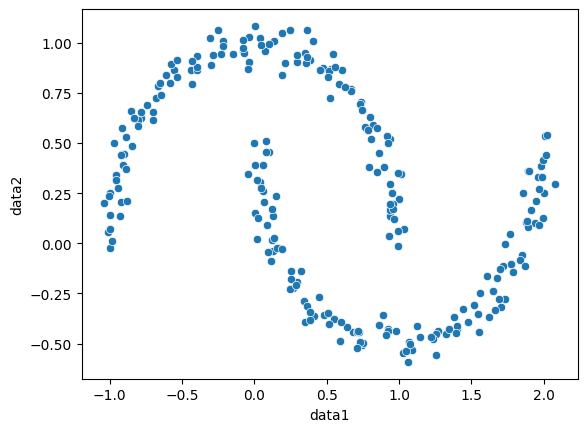

In [30]:
# graphical representation
sns.scatterplot(x=d_set['data1'], y=d_set['data2'], data=d_set)
plt.show()

### result: we can apply dbscan on the above dataset as follows

In [28]:
# model
db=DBSCAN(eps=0.2 , min_samples=5)

# predictions
d_set['predicted']=db.fit_predict(d_set)
d_set

,data1,data2,output,predicted
0,1.909919,0.167085,1,0
1,0.736618,0.707284,0,1
2,-0.906545,0.389815,0,1
3,0.126362,-0.038288,1,0
4,1.035179,0.071341,0,1
...,...,...,...,...
245,1.395817,-0.447671,1,0
246,0.912882,-0.455841,1,0
247,0.446574,-0.265488,1,0
248,2.016675,0.441194,1,0


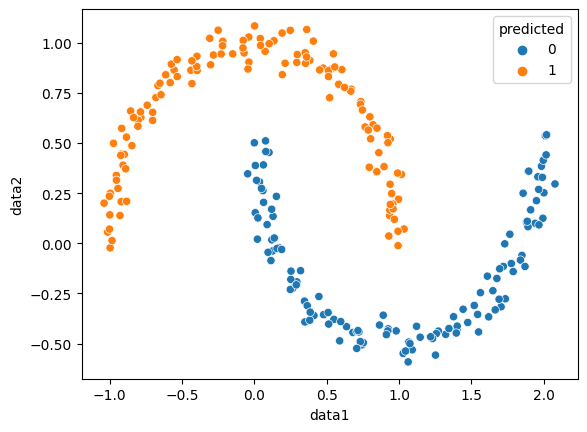

In [29]:
# now graphical representation
sns.scatterplot(x=d_set['data1'], y=d_set['data2'], data=d_set, hue=d_set['predicted'])
plt.show()

### result: from above graph it is clear that the model is perfectly trained